# Portfolio Selection Strategies
## Author: Snigdhayan Mahanta
Suppose there are 100 projects to choose from and only 10 projects can be funded with the available budget. What should be the strategy to select the projects for execution? To simplify the problem I ignored the project duration so that the `discount rate` can be left out of cost and value calculations. I also ignored the project quality since it is not easily quantifiable. Hence each project consists of the following attributes:

1. `Value` - this is a higher abstraction of scope that the project execution achieves (cash inflow)
2. `Risk` - this is the probability of failure of the project (should be greater than `inherent risk`)
3. `Cost` - this is some abstract estimate of the project expenses (cash outflow)

I created a configurable `risk tolerance` parameter. A project is considered for portfolio selection only if its associated `risk` falls below the value of this parameter. Based on this information I can think of two simple strategies:

1. Risk-adjusted strategy - rank the projects according to `expected value` (taking into account the risk probabilities).
2. Value-driven strategy - rank the projects according to `normalized value` (value divided by cost) ignoring risk.

Roughly speaking, the first approach is an additive model and the second approach is a multiplicative model. After creating a random portfolio of projects satisfying the boundary conditions, I applied the two selection strategies and compared the outcomes. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Global parameters
inherent_risk = 20 # minimum risk involved in any project as a percentage
risk_tolerance = 80 # configurable but should be greater than inherent_risk

In [3]:
# Definition of project
class project:
    '''
    project has attributes 'value', 'risk' and 'cost'
    
    '''
    
    def __init__(self):
        self.value = np.random.choice(a=range(100, 10000))
        self.risk = np.random.choice(a=range(inherent_risk, risk_tolerance))/100
        self.cost = np.random.choice(a=range(100, 1000))

    def execute(self):
        return np.random.choice(a=[0,1], p=[self.risk, 1-self.risk]) # 0 = failure, 1 = success  
    
    def expected_value(self):
        return (self.value-self.cost)*(1-self.risk) - self.cost*self.risk
    
    def normalized_value(self):
        return self.value/self.cost
    
    def earned_value(self):
        return self.execute()*self.value - self.cost

In [4]:
# Portfolio creation function
def create_portfolio(n_projects):
    '''
    create a portfolio of projects

    '''
    
    expected_values_dict = {}
    normalized_values_dict = {}
    earned_values_dict = {}
    
    for i in range(1, n_projects+1):
        proj = project()
        key_1 = i 
        key_2 = i
        key_3 = i
        expected_values_dict[key_1] = proj.expected_value()
        normalized_values_dict[key_2] = proj.normalized_value()
        earned_values_dict[key_3] = proj.earned_value()
        
    return expected_values_dict, normalized_values_dict, earned_values_dict

In [5]:
# Simulation parameters
n_projects = 100
n_selected = 10
exp_vals, norm_vals, earn_vals = create_portfolio(n_projects)

In [6]:
# Strategy 1 - select projects based on expected value
exp_vals = dict(sorted(exp_vals.items(), key=lambda item: item[1], reverse=True))
exp_vals = list(exp_vals.items())
exp_vals = exp_vals[0:n_selected]
selected_projects_1 = [element[0] for element in exp_vals]

In [7]:
# Strategy 2 - select projects based on normalized value
norm_vals = dict(sorted(norm_vals.items(), key=lambda item: item[1], reverse=True))
norm_vals = list(norm_vals.items())
norm_vals = norm_vals[0:n_selected]
selected_projects_2 = [element[0] for element in norm_vals]

In [8]:
# Comparison of the two selection strategies
data = {'Strategy 1 - Expected Values': exp_vals, 'Strategy 2 - Normalized Values': norm_vals}
project_selection = pd.DataFrame(data=data)
project_selection

,Strategy 1 - Expected Values,Strategy 2 - Normalized Values
0,"(21, 6247.6)","(34, 86.76146788990826)"
1,"(53, 6057.0)","(96, 60.51162790697674)"
2,"(14, 5907.28)","(18, 44.52857142857143)"
3,"(18, 5868.150000000001)","(24, 42.55294117647059)"
4,"(72, 5731.400000000001)","(60, 40.30769230769231)"
5,"(63, 5703.92)","(37, 37.68468468468468)"
6,"(66, 5538.74)","(87, 34.18881118881119)"
7,"(100, 5476.5)","(17, 32.21465968586387)"
8,"(30, 5258.8099999999995)","(10, 30.695652173913043)"
9,"(88, 4950.5)","(65, 26.46564885496183)"


In [9]:
# Projects selected by both strategies
common_selection = list(set(selected_projects_1).intersection(selected_projects_2))
common_selection

[18]

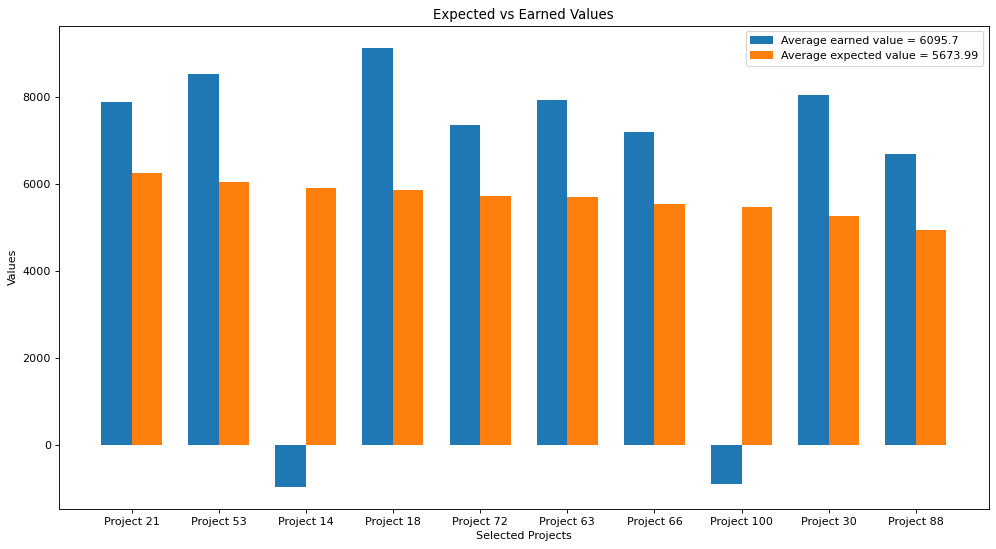

In [10]:
# Visualize the expected vs the earned values
labels = ["Project "+str(p) for p in selected_projects_1]
x = np.arange(len(labels))  # the label locations

y1 = [earn_vals[n] for n in selected_projects_1]
avg_earn_val = round(sum(y1)/len(y1),2)

y2 = [element[1] for element in exp_vals]
avg_exp_val = round(sum(y2)/len(y2),2)

width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
rects1 = ax.bar(x - width/2, y1, width, label='Earned')
rects2 = ax.bar(x + width/2, y2, width, label='Expected')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Selected Projects')
ax.set_ylabel('Values')
ax.set_title('Expected vs Earned Values')
ax.set_xticks(x)
ax.set_xticklabels(labels)
legends = [F'Average earned value = {avg_earn_val}', 
           F'Average expected value = {avg_exp_val}']
ax.legend(legends, loc='upper right')

#ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

#fig.tight_layout()
#figure(figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

plt.show()

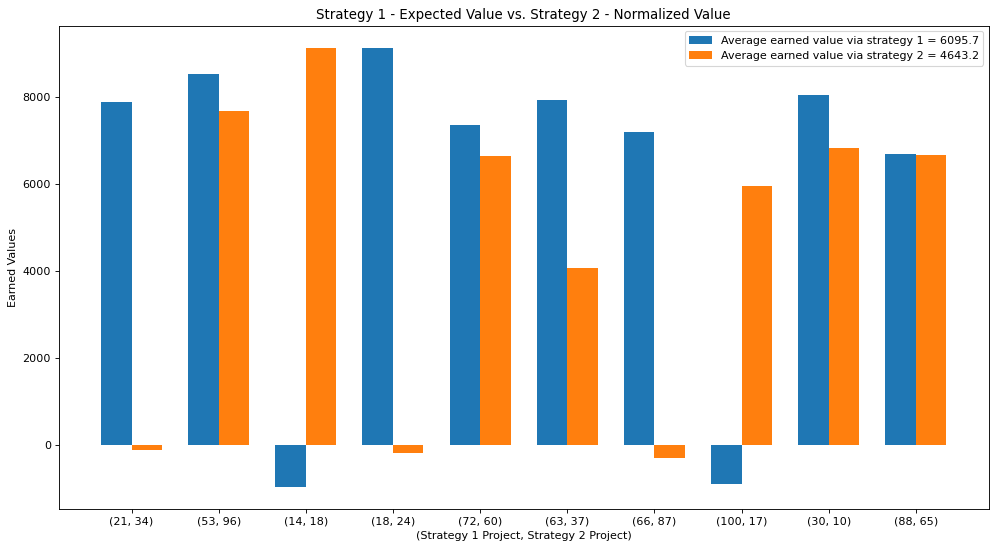

In [11]:
# Visualize the comparison of the two strategies
#labels = [str(p) for p in range(1, n_selected+1)]
labels = list(zip(selected_projects_1, selected_projects_2))
x = np.arange(len(labels))  # the label locations

y1 = [earn_vals[n] for n in selected_projects_1]
avg_earn_val_1 = round(sum(y1)/len(y1),2)

y2 = [earn_vals[n] for n in selected_projects_2]
avg_earn_val_2 = round(sum(y2)/len(y2),2)

width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
rects1 = ax.bar(x - width/2, y1, width, label=selected_projects_1)
rects2 = ax.bar(x + width/2, y2, width, label=selected_projects_2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('(Strategy 1 Project, Strategy 2 Project)')
ax.set_ylabel('Earned Values')
ax.set_title('Strategy 1 - Expected Value vs. Strategy 2 - Normalized Value')
ax.set_xticks(x)
ax.set_xticklabels(labels)
legends = [F'Average earned value via strategy 1 = {avg_earn_val_1}', 
           F'Average earned value via strategy 2 = {avg_earn_val_2}']
ax.legend(legends, loc='upper right')

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

#fig.tight_layout()

plt.show()